In [25]:
import numpy as np
import healpy as hp
import h5py, os

from msfm.utils.input_output import read_yaml

In [26]:
conf_dir = "../../configs/config.yaml"
conf = read_yaml(conf_dir)

n_side = conf["analysis"]["n_side"]
n_pix = conf["analysis"]["n_pix"]

In [27]:
repo_dir = "/global/homes/a/athomsen/multiprobe-simulation-forward-model"

pix_file_dir = os.path.join(repo_dir, conf["files"]["pixels"])
with h5py.File(pix_file_dir, "r") as f:
    data_vec_ids = f["metacal/map_cut_outs/data_vec_ids"][:]

In [28]:
example_dv_file = "/pscratch/sd/a/athomsen/DESY3/grid/cosmo_000001/perm_0000/data_vectors.h5"
with h5py.File(example_dv_file, "r") as f:
    kg_dv = f["kg"][:]

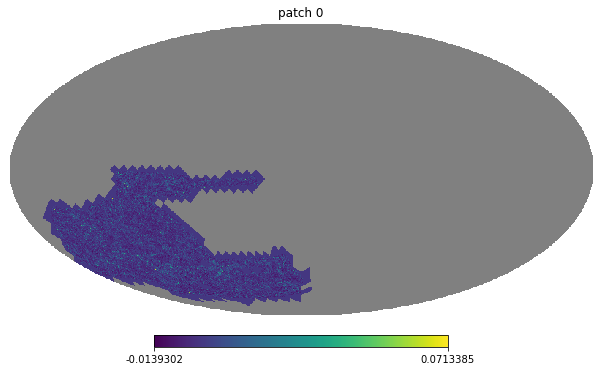

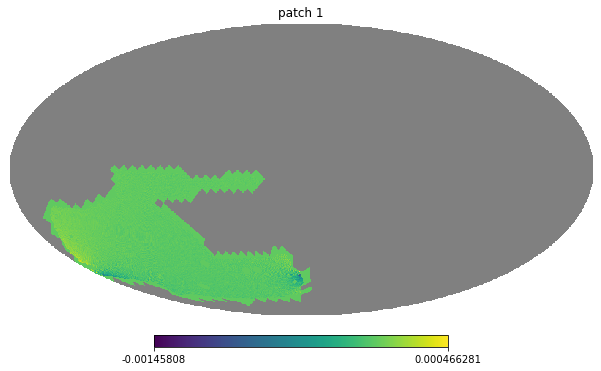

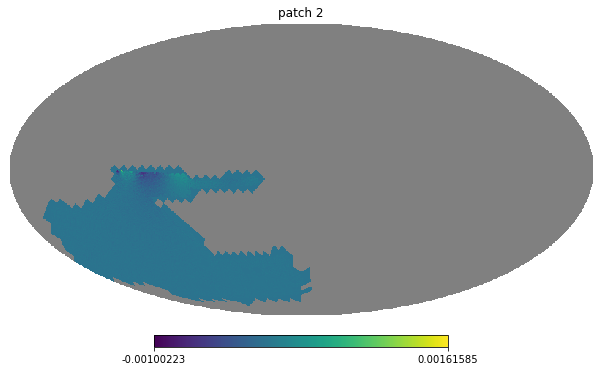

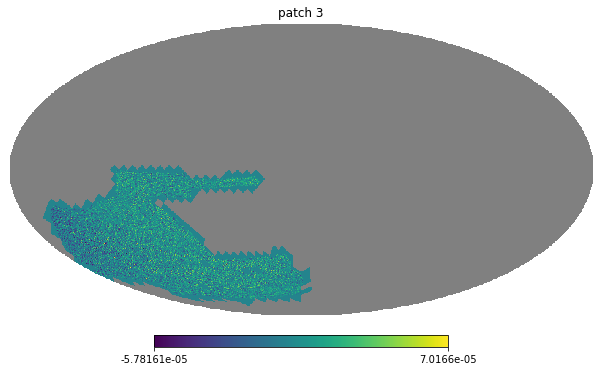

In [33]:
tomo = 1

for i_patch in range(4):
    example_map = np.full(n_pix, hp.UNSEEN)
    example_map[data_vec_ids] = kg_dv[i_patch,:,tomo]
    
    hp.mollview(example_map, title=f"patch {i_patch}", nest=True)